# Analyze Google Play Store dataset

```
Dashboard: https://datastudio.google.com/open/1aYKufdQ5ZW1mMSqXAPJ5y2WErK-tsMw9
```

## I - Some question to answer first
1. What are we analyze? What we want to get? What is our problems?
2. What is the metric of sucess?
3. Is the input dataset enough to solve our problems?

## II - Take a look at the dataset and clean it

### Import tool

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

### Google Drive authenication

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import gspread
from gspread_dataframe import get_as_dataframe, set_with_dataframe 

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

### Download and read the dataset

In [0]:
link = 'https://drive.google.com/open?id=1jje-EQBSIp5FSsldVUfiQmH_3YcufwWx'
fluff, id = link.split('=')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('google-play-store.csv')  

In [4]:
gpstore = pd.read_csv('google-play-store.csv')
gpstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Get some information of this dataset

In [5]:
gpstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
gpstore.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9367.0,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0


### Take a look of values in each column and clean it

#### App

In [7]:
# sort by Last Updated
gpstore.sort_values(by='Last Updated', ascending=True, inplace=True)

# drop all the duplicated
gpstore.drop_duplicates(subset = ['App', 'Category', 'Type', 'Content Rating', 'Genres'], keep = 'last', inplace = True)
gpstore.drop_duplicates(subset = ['App', 'Last Updated'], keep = 'last', inplace = True)

# that means we only keep the Latest Updated App in every app having the same values in ['App', 'Category', 'Type', 'Content Rating', 'Genres']
gpstore['App'].value_counts()

Bubble Shooter                                       3
Chess Free                                           2
English Grammar Test                                 2
Farm Heroes Saga                                     2
Solitaire                                            2
Call Blocker                                         2
Duolingo: Learn Languages Free                       2
Edmodo                                               2
Video Editor                                         2
Cardiac diagnosis (heart rate, arrhythmia)           2
Calculator                                           2
Period Tracker                                       2
Ruler                                                2
FIFA 16 Soccer                                       1
Dr. B.R.Ambedkar                                     1
TI-84 CE Graphing Calculator Manual TI 84            1
HEAD TRAUMA CT EVALUATION                            1
Stick 'Em Up 2 Starter Edition                       1
AP Mobile 

In [0]:
gpstore_name_count = gpstore['App'].value_counts()
gpstore_DiffAppSameName_list = gpstore_name_count[gpstore_name_count > 1].index.tolist()
for appName in gpstore_DiffAppSameName_list:
    appName_condition = (gpstore['App'] == appName)
    gpstore.loc[appName_condition, ['App']] = gpstore[appName_condition]['App'] + ' (' + gpstore[appName_condition]['Genres'] + ')'

In [9]:
gpstore['App'].value_counts()

Farm Heroes Saga (Casual)                               2
Cardiac diagnosis (heart rate, arrhythmia) (Medical)    2
English Grammar Test (Education)                        2
Edmodo (Education)                                      2
Duolingo: Learn Languages Free (Education;Education)    2
Shopee - No. 1 Online Shopping                          1
TI-84 CE Graphing Calculator Manual TI 84               1
Modern Counter Global Strike 3D V2                      1
Axe Champion                                            1
JoJo Siwa Top Hits Music                                1
BK Travel Solutions                                     1
Jumia online shopping                                   1
Manga Rock - Best Manga Reader                          1
HEAD TRAUMA CT EVALUATION                               1
King of Avalon: Dragon Warfare                          1
Stick 'Em Up 2 Starter Edition                          1
AP Mobile 104                                           1
AAS-IN-ASIA 20

In [10]:
gpstore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9674 entries, 10472 to 6834
Data columns (total 13 columns):
App               9674 non-null object
Category          9674 non-null object
Rating            8210 non-null float64
Reviews           9674 non-null object
Size              9674 non-null object
Installs          9674 non-null object
Type              9673 non-null object
Price             9674 non-null object
Content Rating    9673 non-null object
Genres            9674 non-null object
Last Updated      9674 non-null object
Current Ver       9666 non-null object
Android Ver       9671 non-null object
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


#### Category

In [11]:
gpstore['Category'].value_counts(dropna=False)

FAMILY                 1872
GAME                    948
TOOLS                   829
BUSINESS                420
MEDICAL                 397
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  326
COMMUNICATION           316
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           164
MAPS_AND_NAVIGATION     131
FOOD_AND_DRINK          112
EDUCATION               109
ENTERTAINMENT            92
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           62
PARENTING                60
COMICS                   56
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

**Why there's '1.9' in category list**

In [12]:
gpstore[gpstore['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Look like all the columns of this row has been shifted. Anyway this row is not reliable, we prefer to dropping it to fixing it

In [13]:
gpstore = gpstore[gpstore['Category'] != '1.9']
gpstore[gpstore['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [14]:
# check our dataframe again
gpstore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9673 entries, 3304 to 6834
Data columns (total 13 columns):
App               9673 non-null object
Category          9673 non-null object
Rating            8209 non-null float64
Reviews           9673 non-null object
Size              9673 non-null object
Installs          9673 non-null object
Type              9672 non-null object
Price             9673 non-null object
Content Rating    9673 non-null object
Genres            9673 non-null object
Last Updated      9673 non-null object
Current Ver       9665 non-null object
Android Ver       9671 non-null object
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


#### Rating

In [15]:
gpstore['Rating'].value_counts(dropna=False)

NaN    1464
4.4     898
4.3     897
4.5     852
4.2     810
4.6     684
4.1     624
4.0     513
4.7     442
3.9     359
3.8     287
5.0     271
3.7     225
4.8     221
3.6     166
3.5     156
3.4     126
3.3     100
4.9      86
3.0      81
3.1      69
3.2      63
2.9      45
2.8      40
2.6      24
2.7      23
2.3      20
2.5      20
2.4      19
1.0      16
2.2      14
2.0      12
1.9      11
1.7       8
1.8       8
2.1       8
1.6       4
1.5       3
1.4       3
1.2       1
Name: Rating, dtype: int64

There are so many NaN values in Rating column, so we will fill them by mean of the non-NaN values

In [16]:
gpstore['Rating'].fillna(round(gpstore[gpstore['Rating'].isnull() == False]['Rating'].mean(), 1), inplace = True) 
gpstore[gpstore['Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


#### Price

In [17]:
gpstore['Price'].value_counts(dropna=False)

0          8917
$0.99       145
$2.99       124
$1.99        73
$4.99        70
$3.99        57
$1.49        46
$5.99        26
$2.49        25
$9.99        19
$399.99      12
$6.99        11
$4.49         9
$14.99        9
$3.49         7
$7.99         7
$29.99        5
$8.99         5
$6.49         5
$19.99        5
$5.49         5
$12.99        4
$2.00         3
$11.99        3
$24.99        3
$1.00         3
$1.70         2
$39.99        2
$10.99        2
$8.49         2
           ... 
$25.99        1
$3.90         1
$3.95         1
$14.00        1
$1.50         1
$19.90        1
$74.99        1
$3.04         1
$1.75         1
$33.99        1
$37.99        1
$1.04         1
$1.96         1
$2.59         1
$2.56         1
$1.59         1
$109.99       1
$28.99        1
$2.95         1
$30.99        1
$200.00       1
$3.08         1
$1.29         1
$154.99       1
$1.61         1
$379.99       1
$394.99       1
$389.99       1
$1.26         1
$3.02         1
Name: Price, Length: 92,

In [18]:
# Price column's dtype is dtype('O') which is Python type string
gpstore.Price.dtype

dtype('O')

In [19]:
gpstore[gpstore['Type']=='Paid']['Price'].head() # e.g $4.99 is a string

4166    $3.88
9478    $2.99
235     $4.99
7466    $0.99
7792    $3.49
Name: Price, dtype: object

In [20]:
# Price in $ is the column having numeric values of Price column
gpstore['Price in $'] = gpstore['Price'].str.lstrip('$').apply(lambda str_f: float(str_f))
gpstore['Price in $'].dtype

dtype('float64')

In [21]:
# check our dataframe again
gpstore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9673 entries, 3304 to 6834
Data columns (total 14 columns):
App               9673 non-null object
Category          9673 non-null object
Rating            9673 non-null float64
Reviews           9673 non-null object
Size              9673 non-null object
Installs          9673 non-null object
Type              9672 non-null object
Price             9673 non-null object
Content Rating    9673 non-null object
Genres            9673 non-null object
Last Updated      9673 non-null object
Current Ver       9665 non-null object
Android Ver       9671 non-null object
Price in $        9673 non-null float64
dtypes: float64(2), object(12)
memory usage: 1.1+ MB


#### Type

In [22]:
gpstore['Type'].value_counts(dropna=False)

Free    8916
Paid     756
NaN        1
Name: Type, dtype: int64

In [23]:
#Type columns has 1 null
gpstore[gpstore['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price in $
9148,Command & Conquer: Rivals,FAMILY,4.2,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device,0.0


In [24]:
# Exclude that row
gpstore.dropna(subset=['Type'], inplace=True)
gpstore[gpstore['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price in $


In [25]:
# check if there are any row that Price is 0 but Type is not Free
gpstore[(gpstore['Price'] == '0') & (gpstore['Type'] != 'Free')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price in $


In [26]:
# check if there are any row that Price is greater than 0 but Type is not Paid
gpstore[(gpstore['Price in $'] > 0) & (gpstore['Type'] != 'Paid')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price in $


In [27]:
# check our dataframe again
gpstore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9672 entries, 3304 to 6834
Data columns (total 14 columns):
App               9672 non-null object
Category          9672 non-null object
Rating            9672 non-null float64
Reviews           9672 non-null object
Size              9672 non-null object
Installs          9672 non-null object
Type              9672 non-null object
Price             9672 non-null object
Content Rating    9672 non-null object
Genres            9672 non-null object
Last Updated      9672 non-null object
Current Ver       9664 non-null object
Android Ver       9670 non-null object
Price in $        9672 non-null float64
dtypes: float64(2), object(12)
memory usage: 1.1+ MB


#### Content Rating

In [28]:
gpstore['Content Rating'].value_counts(dropna=False)

Everyone           7917
Teen               1036
Mature 17+          393
Everyone 10+        321
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [29]:
#Unrated can be considered as NaN value and there are only 2 row having Unrated value in Content Rating column, so we drop them =))
gpstore = gpstore[gpstore['Content Rating'] != 'Unrated']
gpstore['Content Rating'].value_counts(dropna=False)

Everyone           7917
Teen               1036
Mature 17+          393
Everyone 10+        321
Adults only 18+       3
Name: Content Rating, dtype: int64

In [30]:
# check our dataframe again
gpstore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9670 entries, 3304 to 6834
Data columns (total 14 columns):
App               9670 non-null object
Category          9670 non-null object
Rating            9670 non-null float64
Reviews           9670 non-null object
Size              9670 non-null object
Installs          9670 non-null object
Type              9670 non-null object
Price             9670 non-null object
Content Rating    9670 non-null object
Genres            9670 non-null object
Last Updated      9670 non-null object
Current Ver       9662 non-null object
Android Ver       9668 non-null object
Price in $        9670 non-null float64
dtypes: float64(2), object(12)
memory usage: 1.1+ MB


#### Reviews / Genres / Last Updated
These columns don't seem to need  cleaning

In [31]:
gpstore['Reviews'].value_counts(dropna=False)

0          592
1          271
2          213
3          170
4          137
5          108
6           94
7           88
8           72
9           64
10          63
12          58
11          52
13          49
17          47
19          41
14          41
20          35
16          35
21          33
25          30
30          30
15          30
24          30
38          29
18          27
22          26
27          25
23          25
33          24
          ... 
6466641      1
249919       1
13565        1
666          1
275048       1
5886         1
1500         1
3755         1
24729        1
139258       1
10369        1
6200         1
531          1
9443         1
14356        1
66321        1
348962       1
5208         1
16073        1
194216       1
18893        1
6577         1
1493         1
226453       1
4334         1
38207        1
819774       1
356          1
3845         1
436615       1
Name: Reviews, Length: 5338, dtype: int64

In [32]:
gpstore['Genres'].value_counts(dropna=False)

Tools                                  827
Entertainment                          560
Education                              512
Business                               420
Medical                                397
Personalization                        376
Productivity                           374
Lifestyle                              368
Finance                                345
Sports                                 331
Communication                          316
Action                                 299
Health & Fitness                       288
Photography                            281
News & Magazines                       254
Social                                 239
Books & Reference                      222
Travel & Local                         218
Shopping                               202
Simulation                             193
Arcade                                 185
Dating                                 171
Casual                                 166
Video Playe

In [33]:
gpstore['Last Updated'].value_counts(dropna=False)

August 3, 2018        252
August 2, 2018        229
August 1, 2018        208
July 31, 2018         206
July 30, 2018         162
July 26, 2018         136
July 25, 2018         129
July 27, 2018         121
July 24, 2018         120
July 23, 2018         111
August 6, 2018        110
July 18, 2018          99
July 19, 2018          98
July 16, 2018          92
July 11, 2018          88
August 4, 2018         85
July 12, 2018          84
July 17, 2018          81
July 9, 2018           80
July 3, 2018           79
July 13, 2018          74
July 5, 2018           72
July 20, 2018          72
May 24, 2018           59
June 26, 2018          55
June 25, 2018          53
July 6, 2018           52
June 27, 2018          51
June 13, 2018          50
July 4, 2018           49
                     ... 
February 27, 2015       1
November 2, 2015        1
October 11, 2013        1
June 17, 2012           1
November 26, 2012       1
January 20, 2014        1
September 11, 2016      1
June 16, 201

#### Current Ver


In [34]:
gpstore[gpstore['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price in $
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up,0.99
7407,Calculate My IQ,FAMILY,4.2,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up,0.00
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up,0.00
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,4.2,8,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up,0.00
7730,UFO-CQ,TOOLS,4.2,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up,0.99
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up,0.00
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up,0.00
6803,BT Master,FAMILY,4.2,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up,0.00


In [0]:
# fill NaN value in Current Ver column with 1.0.0
gpstore['Current Ver'].fillna('1.0.0', inplace=True)

#### Android Ver

In [36]:
gpstore['Android Ver'].value_counts(dropna=False)

4.1 and up            2204
4.0.3 and up          1397
4.0 and up            1288
Varies with device     991
4.4 and up             818
2.3 and up             619
5.0 and up             512
4.2 and up             372
2.3.3 and up           272
2.2 and up             239
3.0 and up             231
4.3 and up             222
2.1 and up             133
1.6 and up             116
6.0 and up              54
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              22
1.5 and up              20
4.4W and up             11
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
NaN                      2
1.0 and up               2
5.0 - 8.0                2
4.1 - 7.1.1              1
2.2 - 7.1.1              1
7.0 - 7.1.1              1
5.0 - 6.0                1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

In [37]:
# Drop 2 NaN value
gpstore.dropna(subset=['Android Ver'], inplace=True)
gpstore[gpstore['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price in $


In [38]:
# Standardize Android Ver: X.X.X - Y.Y.Y
regex = ' [\w+]+(?:\.\w+) '
gpstore['Android Ver'] = " " + gpstore['Android Ver'] + " "

gpstore['Android Ver'] = gpstore['Android Ver'].str.replace('and', '-')
gpstore['Android Ver'] = gpstore['Android Ver'].str.replace('up', 'latest')

import re
def append_by_regex(text):
  search_value = re.search(regex, text)
  while search_value:
    pos = search_value.end()
    text = text[:pos].rstrip() + ".0 " + text[pos:] 
    search_value = re.search(regex, text)
  return text

gpstore['Android Ver'] = gpstore['Android Ver'].apply(append_by_regex)
gpstore['Android Ver'] = gpstore['Android Ver'].str.strip()
gpstore['Android Ver'].value_counts(dropna=False)

4.1.0 - latest        2204
4.0.3 - latest        1397
4.0.0 - latest        1288
Varies with device     991
4.4.0 - latest         818
2.3.0 - latest         619
5.0.0 - latest         512
4.2.0 - latest         372
2.3.3 - latest         272
2.2.0 - latest         239
3.0.0 - latest         231
4.3.0 - latest         222
2.1.0 - latest         133
1.6.0 - latest         116
6.0.0 - latest          54
7.0.0 - latest          42
3.2.0 - latest          36
2.0.0 - latest          32
5.1.0 - latest          22
1.5.0 - latest          20
4.4W.0 - latest         11
3.1.0 - latest          10
2.0.1 - latest           7
8.0.0 - latest           6
7.1.0 - latest           3
5.0.0 - 8.0.0            2
4.0.3 - 7.1.1            2
1.0.0 - latest           2
5.0.0 - 7.1.1            1
5.0.0 - 6.0.0            1
4.1.0 - 7.1.1            1
2.2.0 - 7.1.1            1
7.0.0 - 7.1.1            1
Name: Android Ver, dtype: int64

In [39]:
# Handle "Varies with device"

# split each value in Android Ver column into two columns Android MinVer and Android MaxVer
gpstore['Android MinVer'] = gpstore['Android Ver'].str.split('-').str[0].str.strip()
gpstore['Android MaxVer'] = gpstore['Android Ver'].str.split('-').str[1].str.strip()

# When there's not "-" in Android Ver string (in case Android Ver value is "Varies with device")
# Android MinVer values will be assigned with "Varies with device", so we re-assign theses values with NaN
gpstore['Android MinVer'].replace('Varies with device', np.NaN, inplace=True)

# Fillna in Android MinVer with min of non-null values in Android MinVer
gpstore['Android MinVer'].fillna(gpstore['Android MinVer'].dropna().min(), inplace=True)

# Fillna in Android MaxVer with max of non-null values in Android MaxVer
gpstore['Android MaxVer'].fillna(gpstore['Android MaxVer'].dropna().max(), inplace=True)

# Replace "- latest" with and up to restore the original form of Android Ver
gpstore['Android Ver'] = gpstore['Android Ver'].str.replace('- latest', "and up")
gpstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price in $,Android MinVer,Android MaxVer
3304,Graphing Calculator,TOOLS,3.9,12388,5.3M,"1,000,000+",Free,0,Everyone,Tools,"April 1, 2016",1.17,2.3.0 and up,0.0,2.3.0,latest
8901,DU Browser—Browse fast & fun,COMMUNICATION,4.3,1133539,4.7M,"10,000,000+",Free,0,Everyone,Communication,"April 1, 2016",6.4.0.4,4.0.0 and up,0.0,4.0.0,latest
9116,PHARMAGUIDE (DZ),HEALTH_AND_FITNESS,4.1,131,3.4M,"5,000+",Free,0,Everyone,Health & Fitness,"April 1, 2016",1.06,1.6.0 and up,0.0,1.6.0,latest
10589,The Florida Trail Guide,TRAVEL_AND_LOCAL,4.3,100,13M,"5,000+",Free,0,Everyone,Travel & Local,"April 1, 2017",6.0.18,4.1.0 and up,0.0,4.1.0,latest
7113,CBRadioTab,TOOLS,3.9,127,1.5M,"50,000+",Free,0,Everyone,Tools,"April 1, 2017",1.0,3.0.0 and up,0.0,3.0.0,latest


In [40]:
# check our dataframe
gpstore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9668 entries, 3304 to 6834
Data columns (total 16 columns):
App               9668 non-null object
Category          9668 non-null object
Rating            9668 non-null float64
Reviews           9668 non-null object
Size              9668 non-null object
Installs          9668 non-null object
Type              9668 non-null object
Price             9668 non-null object
Content Rating    9668 non-null object
Genres            9668 non-null object
Last Updated      9668 non-null object
Current Ver       9668 non-null object
Android Ver       9668 non-null object
Price in $        9668 non-null float64
Android MinVer    9668 non-null object
Android MaxVer    9668 non-null object
dtypes: float64(2), object(14)
memory usage: 1.3+ MB


#### Install

In [41]:
gpstore['Installs'].value_counts()

1,000,000+        1420
100,000+          1115
10,000+           1030
10,000,000+        937
1,000+             888
100+               710
5,000,000+         610
500,000+           505
5,000+             468
50,000+            468
10+                385
500+               327
50+                204
50,000,000+        203
100,000,000+       191
5+                  82
1+                  67
500,000,000+        24
1,000,000,000+      20
0+                  14
Name: Installs, dtype: int64

In [42]:
# Installs column's dtype is dtype('O') which is Python type string
gpstore['Installs'].dtype

dtype('O')

In [0]:
# The number of installations of each app can be equal or greater than the value in Installs column
# So we create Installs At Least column having numeric value of the number of installations at least
gpstore['Installs At Least'] = gpstore['Installs'].replace('[^0-9]', '', regex=True).astype(int)

In [44]:
gpstore['Installs At Least'].value_counts()

1000000       1420
100000        1115
10000         1030
10000000       937
1000           888
100            710
5000000        610
500000         505
50000          468
5000           468
10             385
500            327
50             204
50000000       203
100000000      191
5               82
1               67
500000000       24
1000000000      20
0               14
Name: Installs At Least, dtype: int64

#### Size

In [45]:
gpstore['Size'].value_counts()

Varies with device    1227
12M                    182
11M                    181
14M                    177
13M                    177
15M                    164
17M                    145
26M                    143
16M                    137
19M                    130
10M                    129
21M                    124
20M                    124
18M                    120
25M                    119
24M                    117
22M                    104
23M                    104
29M                     92
27M                     91
28M                     90
30M                     83
3.3M                    73
33M                     71
2.3M                    68
2.9M                    67
2.5M                    67
37M                     67
31M                     67
35M                     65
                      ... 
619k                     1
48k                      1
953k                     1
288k                     1
28k                      1
658k                     1
1

In [0]:
gpstore['Size In Byte'] = gpstore['Size']

In [0]:
import re

In [0]:
index_list = gpstore.index.values.tolist()
for indx in index_list:
  old_value = gpstore.at[indx, 'Size In Byte']
  if (old_value == 'Varies with device'):
    continue
  old_value_abs = re.findall('\d+\.*\d*', old_value)
  # Check to make sure only 1 number value
  if (len(old_value_abs) != 1):
    print(old_value)
  old_value_unit = re.findall('[^\d\W]$', old_value)
#   print(old_value_unit)
  new_value = 0
  if old_value_unit[0] == 'M':
    new_value = float(old_value_abs[0]) * 1000000
  elif old_value_unit[0] == 'k':
    new_value = float(old_value_abs[0]) * 1000
  else:
    print("Error: undefine unit ", old_value_unit)
  gpstore.at[indx, 'Size In Byte'] = new_value

Now we update "Varies with device" size by mean value of each category

In [0]:
cate_list = gpstore['Category'].unique().tolist()
gpstore['Size In Byte'].replace(to_replace='Varies with device', value=np.nan, inplace=True)
gpstore['Size In Byte'].astype('category', inplace=True)
for cate in cate_list:
  cate_size_mean = round(gpstore[gpstore['Category'] == cate]['Size In Byte'].mean(), 1)
  gpstore[gpstore['Category'] == cate] = gpstore[gpstore['Category'] == cate].fillna(cate_size_mean)
  

In [50]:
gpstore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9668 entries, 3304 to 6834
Data columns (total 18 columns):
App                  9668 non-null object
Category             9668 non-null object
Rating               9668 non-null float64
Reviews              9668 non-null object
Size                 9668 non-null object
Installs             9668 non-null object
Type                 9668 non-null object
Price                9668 non-null object
Content Rating       9668 non-null object
Genres               9668 non-null object
Last Updated         9668 non-null object
Current Ver          9668 non-null object
Android Ver          9668 non-null object
Price in $           9668 non-null float64
Android MinVer       9668 non-null object
Android MaxVer       9668 non-null object
Installs At Least    9668 non-null int64
Size In Byte         9668 non-null float64
dtypes: float64(3), int64(1), object(14)
memory usage: 1.7+ MB


Try to find some duplicate

In [51]:
gpstore_app_lower = gpstore['App'].str.lower()
gpstore[gpstore.duplicated(subset='App', keep=False)]['App'].value_counts()

Duolingo: Learn Languages Free (Education;Education)    2
Farm Heroes Saga (Casual)                               2
Cardiac diagnosis (heart rate, arrhythmia) (Medical)    2
English Grammar Test (Education)                        2
Edmodo (Education)                                      2
Name: App, dtype: int64

## III. Let draw some figure

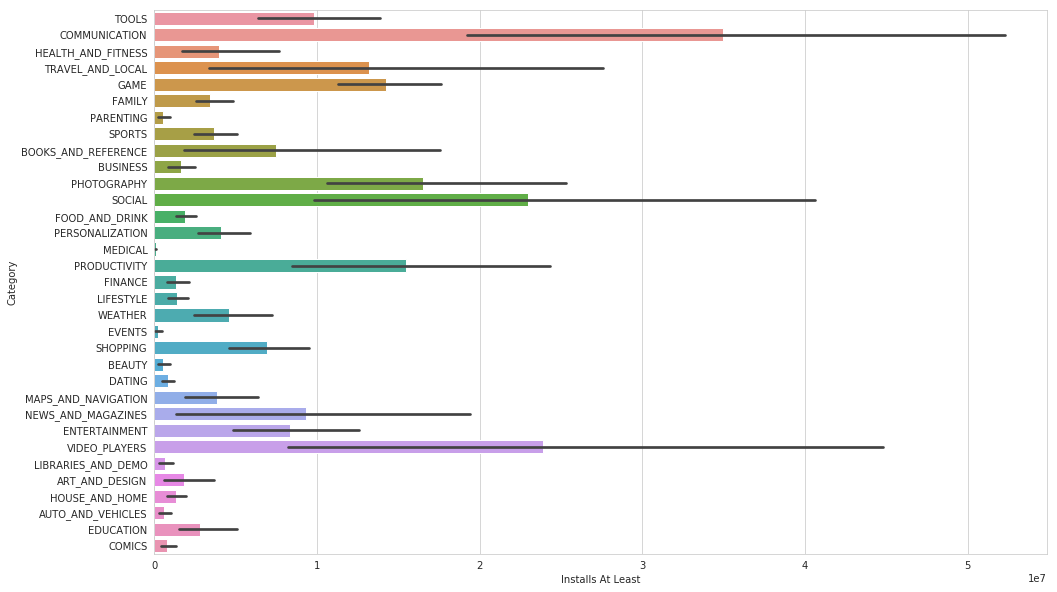

In [52]:
plt.figure(figsize=(16, 10))
sns.barplot(data=gpstore, y='Category', x='Installs At Least')

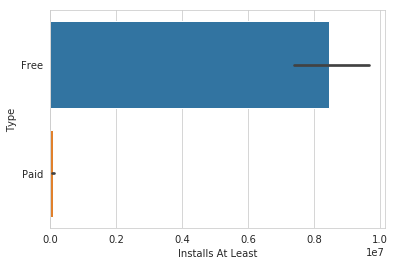

In [53]:
sns.barplot(data=gpstore, y='Type', x='Installs At Least')

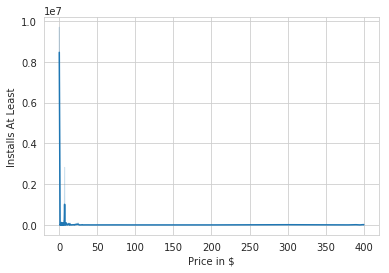

In [54]:
sns.lineplot(data=gpstore, x='Price in $', y='Installs At Least')

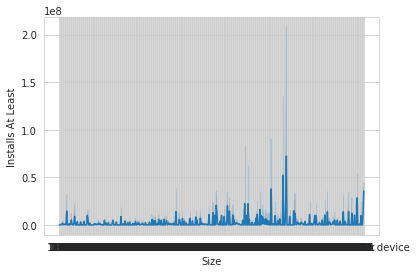

In [55]:
sns.lineplot(data=gpstore, x='Size', y='Installs At Least')

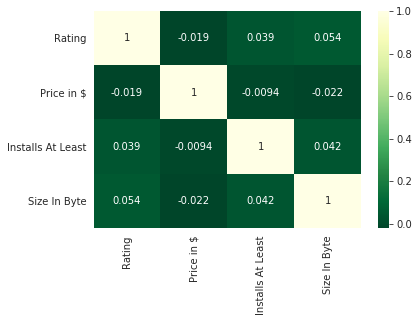

In [56]:
sns.heatmap(gpstore.corr(), annot=True, cmap='YlGn_r')

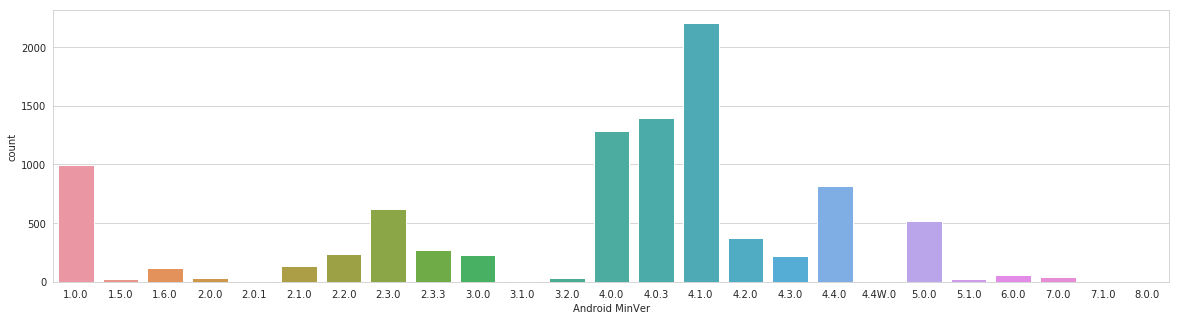

In [57]:
plt.figure(figsize=(20, 5))
sns.countplot(data=gpstore.sort_values(by='Android MinVer', ascending=True), x='Android MinVer')

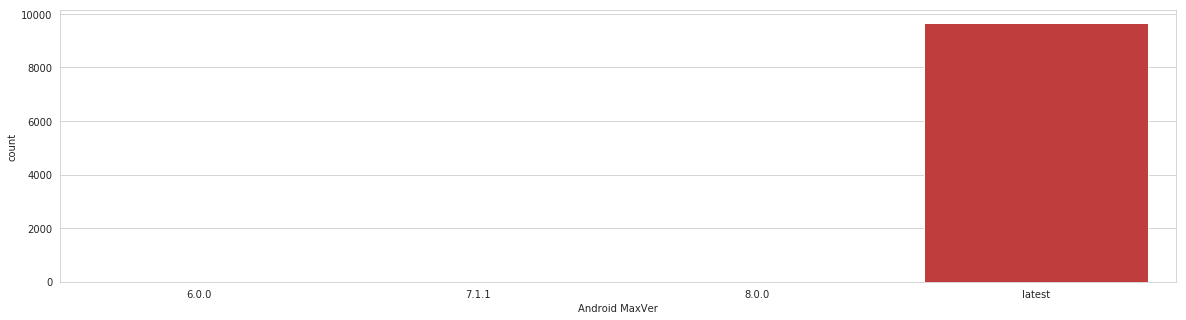

In [58]:
plt.figure(figsize=(20, 5))
sns.countplot(data=gpstore.sort_values(by='Android MaxVer', ascending=True), x='Android MaxVer')

## IV. Make Google sheet

In [0]:
gc = gspread.authorize(GoogleCredentials.get_application_default()) #grant access to google drive 

In [0]:
def check_exists(path):
  try:
    sh = gc.open(path)
    return True
  except:
    return False

def create_new_worksheet(path='worksheet', sheets={"sheet1":""}):
    if check_exists(path):
        print('create_new_worksheet(): File exists')
        return gc.open(path)
    sh = gc.create(path)
    for name, cols in sheets.items():
        sh.add_worksheet(title=name, rows="100", cols="100")
        sh.values_update(
            name + '!A1',
            params={'valueInputOption': 'RAW'},
            body={'values': [cols]}
        )      
    sh.del_worksheet(sh.sheet1)
    return sh

In [0]:
sheets = {
    'Google Play Store': gpstore.columns.values.tolist()
}
sh = create_new_worksheet('Google Play Store', sheets)

In [62]:
sh.values_update(
  'Google Play Store!A2',
    params={'valueInputOption': 'RAW'},
    body={'values': gpstore.fillna('').values.tolist()}
)

{'spreadsheetId': '1Ej5OndGroS7DNfQc0ytnDvvXuif5voTQ0lT5Bb_5i9c',
 'updatedCells': 174024,
 'updatedColumns': 18,
 'updatedRange': "'Google Play Store'!A2:R9669",
 'updatedRows': 9668}